In [1]:
import torchvision
import torch
import torchvision.transforms as transforms
from PIL import Image as Image
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as patches
import matplotlib.image as mpimg

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [3]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
       

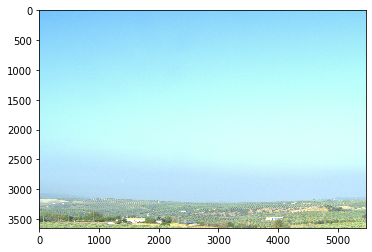

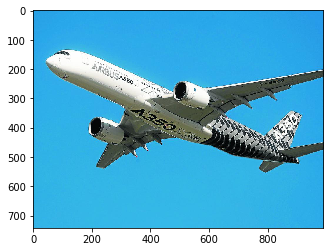

In [441]:
img1 = Image.open("1.jpg")
img2 = Image.open("2.jpg")
plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

In [442]:
input1 = transforms.ToTensor()(img1).unsqueeze(0)
print(input1.shape)

input2 = transforms.ToTensor()(img2).unsqueeze(0)
print(input2.shape)

torch.Size([1, 3, 3648, 5472])
torch.Size([1, 3, 742, 990])


In [430]:
predictions = model(input2)
predictions

[{'boxes': tensor([[ 58.8907, 112.1296, 976.7006, 549.2443],
          [363.5056, 172.5840, 978.3972, 457.7949]], grad_fn=<StackBackward>),
  'labels': tensor([5, 5]),
  'scores': tensor([0.9978, 0.3162], grad_fn=<IndexBackward>)}]

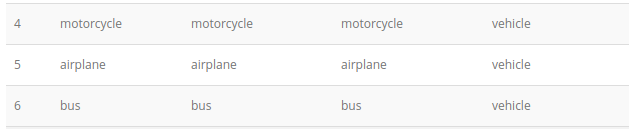

In [255]:
Image(filename ="Captura.png", width=600, height=100)

In [88]:
_, k = torch.max(predictions[0]["scores"], 0)
print("LABEL ", predictions[0]["labels"][k].item())
print("BBOX ", predictions[0]["boxes"][k].data)


LABEL  5
BBOX  tensor([ 58.8907, 112.1296, 976.7006, 549.2443])


In [431]:
bb = predictions[0]["boxes"][k].data.numpy()

In [432]:
bb

array([ 58.890682, 112.12963 , 976.70056 , 549.24426 ], dtype=float32)

In [433]:
rect = patches.Rectangle((bb[0], bb[1]),bb[2]-bb[0], bb[3]-bb[1],linewidth=2,edgecolor='r',facecolor='none')

Ya le he pillado el truco al formato de los Boundaries boxes =D


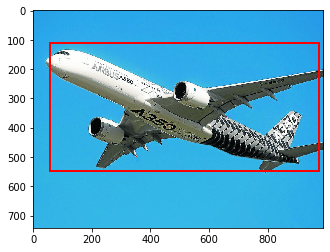

In [434]:
print("\033[1m" + "Ya le he pillado el truco al formato de los Boundaries boxes =D")

fig,ax = plt.subplots(1)
ax.imshow(img2)
ax.add_patch(rect)
plt.show()

In [435]:
predictions = model(input1)
predictions

print("Results are nothing: ", predictions)

Results are nothing:  [{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward>), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([], grad_fn=<IndexBackward>)}]


### How small can be the plain with RPN approach?

In [191]:
import cv2

In [457]:
img1 = mpimg.imread('1.jpg')

Dimension total:  (3648, 5472, 3)


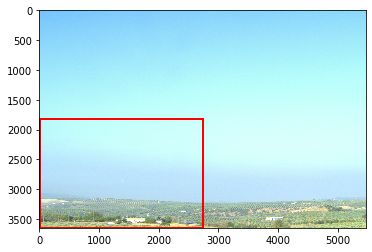

In [216]:
print("Dimension total: ", img1.shape)
rect = patches.Rectangle((1, 1824),2736,1824,linewidth=2,edgecolor='r',facecolor='none')
fig,ax = plt.subplots(1)
ax.imshow(img1)
ax.add_patch(rect)
plt.show()

In [228]:
img_zoom = Image.fromarray(img1[1824:, :2736])
img_zoom = transforms.ToTensor()(img_zoom).unsqueeze(0)
img_zoom.shape

torch.Size([1, 3, 1824, 2736])

In [240]:
predictions = model(img_zoom)
predictions

[{'boxes': tensor([[1362.2139, 1022.4509, 1404.7397, 1042.9998],
          [1362.4574, 1021.3264, 1406.0061, 1042.2369],
          [1360.2346, 1017.6513, 1408.6019, 1047.0372],
          [1362.3982, 1022.7736, 1404.1788, 1039.1486]], grad_fn=<StackBackward>),
  'labels': tensor([38,  5, 16, 16]),
  'scores': tensor([0.5039, 0.2024, 0.1014, 0.0786], grad_fn=<IndexBackward>)}]

In [287]:
_, ks = torch.topk(predictions[0]["scores"], 6, dim=0)
labels = predictions[0]["labels"][ks]
print(labels[:], " => Cometa y avión respectivamente: ", _[:].data)
print("Posiciones de interés: \n", predictions[0]["boxes"][ks].data)

bb1, bb2 = predictions[0]["boxes"][ks].data 

tensor([38,  5])  => Cometa y avión respectivamente:  tensor([0.5039, 0.2024])
Posiciones de interés: 
 tensor([[1362.2139, 1022.4509, 1404.7397, 1042.9998],
        [1362.4574, 1021.3264, 1406.0061, 1042.2369]])


In [276]:
img_zoom = img_zoom.squeeze(0)
img_zoom.shape

torch.Size([3, 1824, 2736])

In [277]:
img_zoom1 = transforms.ToPILImage()(img_zoom)

<Figure size 3600x3600 with 0 Axes>

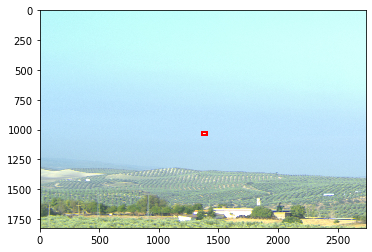

In [306]:
rect1 = patches.Rectangle((bb1[0], bb1[1]),bb1[2]-bb1[0], bb1[3]-bb1[1],linewidth=2,edgecolor='r',facecolor='none')
plt.figure(1, figsize=(50, 50))

fig,ax = plt.subplots(1)
ax.imshow(img_zoom1)
ax.add_patch(rect1)
plt.show()

In [386]:
img1 = mpimg.imread('zoom1.jpg')

x1 = int(bb1[0])
y1 = int(bb1[1])
w1 = int(bb1[2]-bb1[0])
h1 = int(bb1[3]-bb1[1])

x2 = int(bb2[0])
y2 = int(bb2[1])
w2 = int(bb2[2]-bb2[0])
h2 = int(bb2[3]-bb2[1])


"I am a kite, Surprise! =D =D


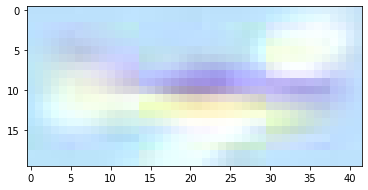

"I am a plane Surprise x2! =D =D


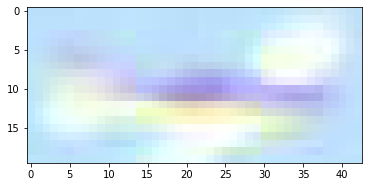

In [389]:
print('\033[91m\033[1m"' + "I am a kite, Surprise! =D =D")

plt.imshow(img1[y1:(y1+h1), x1:x1+w1])
plt.show()
print('\033[91m\033[1m"' + "I am a plane Surprise x2! =D =D")

plt.imshow(img1[y2:(y2+h2), x2:x2+w2])
plt.show()


And what now?


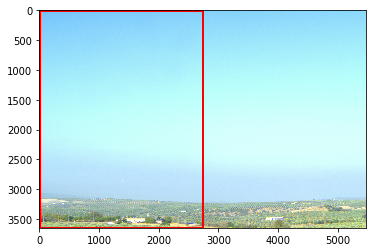

(3648, 5472, 3)


In [461]:

rect = patches.Rectangle((1, 10),2736,3640,linewidth=2,edgecolor='r',facecolor='none')
fig,ax = plt.subplots(1)
ax.imshow(img1)
ax.add_patch(rect)
plt.show()
print(img1.shape)

(3648, 2736, 3)


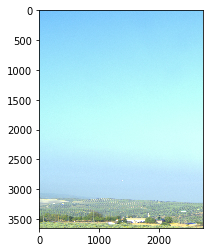

In [462]:
plt.imshow(img1[:, :2736])
print(img1[:, :2736].shape)

In [463]:
img_zoom = Image.fromarray(img1[:, :2736])
img_zoom = transforms.ToTensor()(img_zoom).unsqueeze(0).cuda()
img_zoom.shape

torch.Size([1, 3, 3648, 2736])

In [464]:
predictions = model(img_zoom)
predictions

[{'boxes': tensor([[1363.4578, 2847.5833, 1402.8151, 2868.3972],
          [1363.8940, 2845.8496, 1404.0884, 2867.0354],
          [1366.3267, 2842.0564, 1401.4019, 2861.5820],
          [1364.2218, 2845.3860, 1403.1527, 2865.8853]], device='cuda:0',
         grad_fn=<StackBackward>),
  'labels': tensor([38, 16, 38,  5], device='cuda:0'),
  'scores': tensor([0.5714, 0.1190, 0.0569, 0.0505], device='cuda:0',
         grad_fn=<IndexBackward>)}]

In [465]:
_, ks = torch.topk(predictions[0]["scores"], 2, dim=0)
labels = predictions[0]["labels"][ks]
print(labels[:], " => Cometa y pájaro respectivamente: ", _[:].data)
print("Posiciones de interés: \n", predictions[0]["boxes"][ks].data)

bb1, bb2 = predictions[0]["boxes"][ks].data 

tensor([38, 16], device='cuda:0')  => Cometa y pájaro respectivamente:  tensor([0.5714, 0.1190], device='cuda:0')
Posiciones de interés: 
 tensor([[1363.4578, 2847.5833, 1402.8151, 2868.3972],
        [1363.8940, 2845.8496, 1404.0884, 2867.0354]], device='cuda:0')


<Figure size 432x288 with 0 Axes>

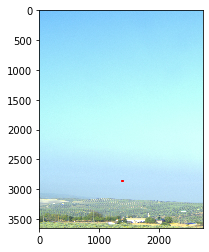

In [506]:
img_zoom = img_zoom.squeeze(0).to("cpu")
img_zoom.shape
img_zoom1 = transforms.ToPILImage()(img_zoom)
img_zoom1.save("zoom2.jpg") 

rect1 = patches.Rectangle((bb1[0], bb1[1]),bb1[2]-bb1[0], bb1[3]-bb1[1],linewidth=1,edgecolor='r',facecolor='none')
rect2 = patches.Rectangle((bb2[0], bb2[1]),bb2[2]-bb2[0], bb2[3]-bb2[1],linewidth=1,edgecolor='g',facecolor='none')


plt.figure(1)

fig,ax = plt.subplots(1)

ax.imshow(img_zoom1)

ax.add_patch(rect1)



plt.show()

In [507]:
img1 = mpimg.imread('zoom2.jpg')

x1 = int(bb1[0])
y1 = int(bb1[1])
w1 = int(bb1[2]-bb1[0])
h1 = int(bb1[3]-bb1[1])

x2 = int(bb2[0])
y2 = int(bb2[1])
w2 = int(bb2[2]-bb2[0])
h2 = int(bb2[3]-bb2[1])

"I am a kite, Surprise! =D =D


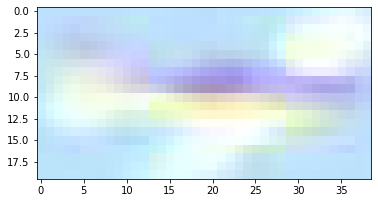

"I am a bird Surprise x2! =D =D


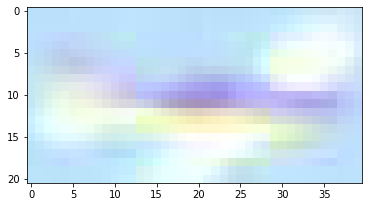

In [508]:
print('\033[91m\033[1m"' + "I am a kite, Surprise! =D =D")

plt.imshow(img1[y1:(y1+h1), x1:x1+w1])
plt.show()
print('\033[91m\033[1m"' + "I am a bird Surprise x2! =D =D")

plt.imshow(img1[y2:(y2+h2), x2:x2+w2])
plt.show()

### INFERENCE TIME OVER 4K IMAGES 

In [436]:
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

with torch.no_grad():
    start.record()
    model(input2)
    end.record()
# Waits for everything to finish running
torch.cuda.synchronize()
print(start.elapsed_time(end))

2698.318603515625


In [440]:
torch.cuda.is_available()

True

In [446]:
model.to("cuda")
input2 = input2.to("cuda")

with torch.no_grad():
    model.eval()
    start.record()
    model(input2)
    end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

1899.134765625


# TESTING

(3648, 5472, 3)


<Figure size 432x288 with 0 Axes>

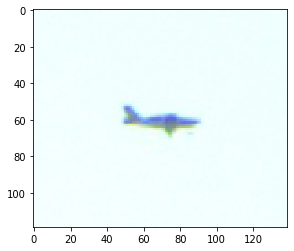

<unfinished torch.autograd.profile>
469.3381042480469


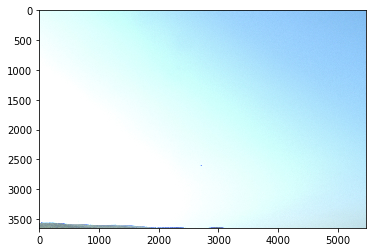

In [6]:
plt.imshow(img3)
plt.show()

In [11]:
tensor = transforms.ToTensor()(img3).unsqueeze(0)
tensor.shape
tensor = tensor.cuda()

In [12]:
model.cuda()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
       

In [13]:
pred = model(tensor)

In [14]:
pred

[{'boxes': tensor([[2693.9326, 2594.0059, 2733.1687, 2613.9849],
          [2695.1162, 2594.1387, 2732.5881, 2614.3425]], device='cuda:0',
         grad_fn=<StackBackward>),
  'labels': tensor([16, 38], device='cuda:0'),
  'scores': tensor([0.1846, 0.0842], device='cuda:0', grad_fn=<IndexBackward>)}]

In [17]:
_, inx = torch.max(pred[0]["scores"], dim = 0)

In [19]:
label = pred[0]["labels"][inx]
label

tensor(16, device='cuda:0')

In [21]:
bb = pred[0]["boxes"][inx].data
bb

tensor([2693.9326, 2594.0059, 2733.1687, 2613.9849], device='cuda:0')

In [28]:
rect1 = patches.Rectangle((bb[0], bb[1]),bb[2]-bb[0], bb[3]-bb[1],linewidth=1,edgecolor='r',facecolor='none')

<Figure size 432x288 with 0 Axes>

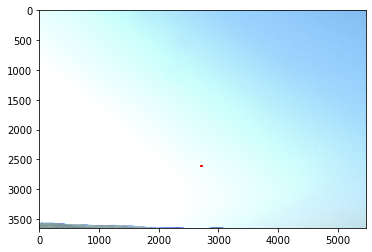

In [29]:
plt.figure(1)
fig,ax = plt.subplots(1)

plt.imshow(img3)
ax.add_patch(rect1)



plt.show()

In [37]:
img3 = mpimg.imread('3.jpg')

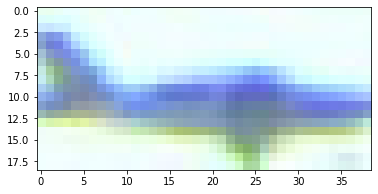

In [40]:
x1 = int(bb[0])
y1 = int(bb[1])
w1 = int(bb[2]-bb[0])
h1 = int(bb[3]-bb[1])

plt.imshow(img3[y1:(y1+h1), x1:x1+w1])
plt.show()

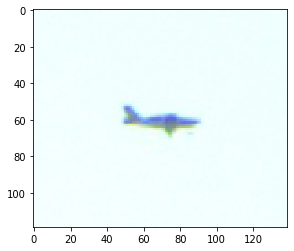

In [44]:
x1 = int(bb[0]-50)
y1 = int(bb[1]-50)
w1 = int(bb[2]-bb[0]+100)
h1 = int(bb[3]-bb[1]+100)

plt.imshow(img3[y1:(y1+h1), x1:x1+w1])
plt.show()

In [45]:
new_img = Image.fromarray(img3[y1:(y1+h1), x1:x1+w1])

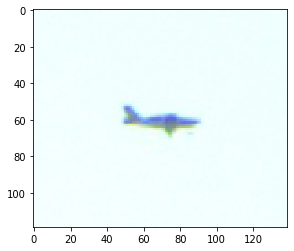

In [46]:
plt.imshow(new_img)
plt.show()

In [47]:
tensor = transforms.ToTensor()(new_img).unsqueeze(0)

In [48]:
tensor = tensor.to("cuda")
model.to("cuda")

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
       

In [49]:
pred = model(tensor)

In [50]:
pred

[{'boxes': tensor([[46.8990, 52.2763, 92.4682, 64.4647],
          [53.2182, 57.8141, 92.2016, 63.0440],
          [48.7160, 52.8675, 91.8114, 63.4125],
          [49.1748, 52.8742, 58.1065, 62.7328],
          [49.1592, 53.9706, 91.5729, 63.7497],
          [48.8709, 53.3040, 91.7196, 62.9029],
          [56.3299, 57.9415, 91.6539, 63.3692],
          [48.0924, 52.5740, 91.1223, 63.6327],
          [54.1515, 57.7677, 91.4775, 63.0045],
          [47.8755, 52.5056, 92.1019, 65.0203]], device='cuda:0',
         grad_fn=<StackBackward>),
  'labels': tensor([ 5, 42,  9,  1, 41, 42, 34,  8,  9, 38], device='cuda:0'),
  'scores': tensor([0.5046, 0.2253, 0.1093, 0.1084, 0.0845, 0.0745, 0.0628, 0.0538, 0.0531,
          0.0529], device='cuda:0', grad_fn=<IndexBackward>)}]

In [3]:
import time

# ANOTHER TEST

In [7]:
img3 = mpimg.imread("3.jpg")
print(img3.shape)
# start = torch.cuda.Event(enable_timing=True)
# end = torch.cuda.Event(enable_timing=True)
model.eval()
model.cuda()
with torch.no_grad() and torch.autograd.profiler.profile(use_cuda=True) as prof:
    
    ######
    # 1 #
    #####
    startw = time.time()
    #start.record()
    
    tensor = transforms.ToTensor()(img3).unsqueeze(0)
    tensor = tensor.cuda()
    model.cuda()
    pred = model(tensor)
    
    
#     _, inx = torch.max(pred[0]["scores"], dim = 0)
#     label = pred[0]["labels"][inx]
#     bb = pred[0]["boxes"][inx].data
    
    x = int(bb[0] - 50)
    y = int(bb[1] - 50)
    w = int(bb[2]-bb[0] + 100)
    h = int(bb[3]-bb[1] + 100)
    
    
#     rect1 = patches.Rectangle((x, y), w, h,linewidth=1,edgecolor='r',facecolor='none')
#     plt.figure(1)
#     fig,ax = plt.subplots(1)
#     plt.imshow(img3)
#     ax.add_patch(rect1)  
#     plt.show()
    
    
    #end.record()
    endw = time.time()
    #torch.cuda.synchronize()
    
    #print(start.elapsed_time(end))    
    print("Stopwatch", endw - startw)

(3648, 5472, 3)
Stopwatch 0.27417659759521484


In [11]:
img3 = mpimg.imread("3.jpg")
print(img3.shape)
#start = torch.cuda.Event(enable_timing=True)
#end = torch.cuda.Event(enable_timing=True)
model.eval()
model.cuda()
with torch.no_grad() and torch.autograd.profiler.profile(use_cuda=True) as prof:
    startw = time.time()
    ######
    # 1 #
    #####
    
    #start.record()
    tensor = transforms.ToTensor()(img3).unsqueeze(0)
    tensor = tensor.cuda()
    model.cuda()
    pred = model(tensor)
    
    
    
    ######
    # 2 #
    #####
    
    _, inx = torch.max(pred[0]["scores"], dim = 0)
    label = pred[0]["labels"][inx]
    bb = pred[0]["boxes"][inx].data
    
    x = int(bb[0] - 50)
    y = int(bb[1] - 50)
    w = int(bb[2]-bb[0] + 100)
    h = int(bb[3]-bb[1] + 100)
    
    
     
    img3 = Image.fromarray(img3[y:(y+h), x:x+w])
    tensor = transforms.ToTensor()(img3).unsqueeze(0)
    tensor = tensor.cuda()
    pred = model(tensor)
    
    ###############
    # print image #
    ###############
    
#     rect1 = patches.Rectangle((x, y), w, h,linewidth=1,edgecolor='r',facecolor='none')
#     plt.figure(1)
#     fig,ax = plt.subplots(1)
#     plt.imshow(img3)
#     ax.add_patch(rect1)  
#     plt.show()
    
    endw = time.time()
    
    print(pred)
    
    #end.record()
    #torch.cuda.synchronize()
    #print(start.elapsed_time(end))
    print("Stopwatch", endw - startw)

(3648, 5472, 3)
[{'boxes': tensor([[46.8990, 52.2763, 92.4682, 64.4647],
        [53.2182, 57.8141, 92.2016, 63.0440],
        [48.7160, 52.8675, 91.8114, 63.4125],
        [49.1748, 52.8742, 58.1065, 62.7328],
        [49.1592, 53.9706, 91.5729, 63.7497],
        [48.8709, 53.3040, 91.7196, 62.9029],
        [56.3299, 57.9415, 91.6539, 63.3692],
        [48.0924, 52.5740, 91.1223, 63.6327],
        [54.1515, 57.7677, 91.4775, 63.0045],
        [47.8755, 52.5056, 92.1019, 65.0203]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([ 5, 42,  9,  1, 41, 42, 34,  8,  9, 38], device='cuda:0'), 'scores': tensor([0.5046, 0.2253, 0.1093, 0.1084, 0.0845, 0.0745, 0.0628, 0.0538, 0.0531,
        0.0529], device='cuda:0', grad_fn=<IndexBackward>)}]
Stopwatch 0.36269378662109375
